In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
crypto_df = pd.read_csv('resources/crypto_data.csv')

In [3]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
#Filter out all coins not be traded
crypto_df_v2 = crypto_df[crypto_df.IsTrading != False]

In [5]:
#Drop IsTrading column
crypto_df_v2.drop(columns=['IsTrading'], axis=1, inplace=True)

In [6]:
#Drop all null values
crypto_df_v2.dropna(inplace=True)

In [7]:
crypto_df_v2

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
#Filter for coins that have been mined
crypto_df_v3 = crypto_df_v2[crypto_df_v2['TotalCoinsMined'] > 0]

In [9]:
crypto_df_v3

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
#Drop CoinName column
crypto_df_v4 = crypto_df_v3.drop(columns=['CoinName', 'Unnamed: 0'], axis=1)

In [11]:
crypto_df_v4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [12]:
#Convert column from object to float
crypto_df_v4["TotalCoinSupply"] = crypto_df_v4["TotalCoinSupply"].astype(float)

In [13]:
crypto_df_v4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [14]:
#Get dummy variables to change Algorith/ProofType into numerical columns
crypto_dummies = pd.get_dummies(crypto_df_v4, prefix=['Algorithm','ProofType'], 
                                columns=['Algorithm','ProofType'])

In [15]:
crypto_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Scale dataset with StandardScaler

scaler = StandardScaler()

scaler.fit(crypto_dummies)

X_scaled = scaler.fit_transform(crypto_dummies)

print(X_scaled[0:1])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

In [17]:
#Create PCA model that will preserve 90% of the explained variance
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(X_scaled)

In [18]:
crypto_pca_df = pd.DataFrame(data=crypto_pca)

crypto_pca_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-6.043801e-12,1.847309e-14,1.013369e-14,-0.007129,-1.319756,-0.051813,...,-1.677778e-15,-4.596658e-16,7.777740e-16,3.203620e-15,-4.669662e-15,-7.875856e-16,1.360104e-15,2.863709e-15,-2.410108e-16,-4.316693e-15
1,-0.318434,1.032331,-0.591126,0.001386,-5.993534e-12,1.845968e-14,1.022985e-14,-0.007739,-1.322514,-0.056674,...,-1.095984e-15,-2.910372e-16,1.834856e-16,3.220514e-15,-3.675575e-15,-9.388027e-16,2.023778e-15,3.113733e-15,-1.745890e-16,-4.482185e-15
2,2.305468,1.656383,-0.683617,0.004731,-2.061981e-11,3.467748e-14,3.540131e-14,-0.054781,-1.542879,-0.943951,...,4.267955e-14,3.952655e-14,-7.571219e-14,-5.200960e-14,1.410566e-13,-1.019401e-14,5.695643e-14,-2.763100e-14,7.715238e-14,-5.481813e-14
3,-0.145184,-1.320593,0.192813,-0.001229,5.355326e-12,-7.922184e-15,-6.824363e-15,-0.002071,0.281463,0.251862,...,-7.991496e-15,6.941662e-15,-1.368862e-14,-1.450731e-14,2.085161e-14,-1.254277e-14,-8.305267e-15,7.937065e-15,1.565953e-14,-3.841119e-15
4,-0.151768,-2.036192,0.396182,-0.001705,7.421485e-12,-1.089537e-14,-1.643773e-14,0.027735,0.519099,0.188820,...,-1.469901e-15,6.292352e-14,1.113939e-13,-1.309083e-13,3.676314e-14,-1.173622e-13,-6.286312e-14,4.548241e-15,-7.689903e-14,-1.446637e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,3.616139e-11,3.418891e-14,7.828088e-14,-0.851713,2.041159,3.560713,...,-9.948548e-15,7.588730e-15,-1.373261e-14,-1.688041e-14,2.566648e-14,-1.631306e-14,-9.718495e-15,9.206129e-15,1.674285e-14,-8.215226e-15
528,-0.333144,1.032071,-0.590740,0.001399,-6.053770e-12,1.842233e-14,1.017574e-14,-0.007154,-1.320125,-0.052460,...,-1.452829e-15,-3.476279e-16,5.675288e-16,3.182431e-15,-4.541140e-15,-5.350522e-16,1.210716e-15,3.339376e-15,-2.404578e-16,-4.484614e-15
529,0.324349,-2.312308,0.421515,-0.001319,5.720204e-12,-1.549548e-14,-1.308517e-14,0.017309,0.161077,-0.047787,...,1.133573e-14,2.060734e-14,1.892009e-14,-3.903442e-14,4.927265e-14,-1.139675e-13,7.651775e-13,1.784478e-14,4.554529e-14,-1.326192e-14
530,-0.149364,-2.049336,0.412968,-0.001745,7.582540e-12,-1.638440e-14,-1.732568e-14,0.028954,0.544389,0.233373,...,-1.584038e-15,3.294774e-15,-3.112837e-15,5.643013e-15,-5.378678e-15,5.496354e-15,6.401560e-16,2.389381e-15,4.206407e-15,2.267521e-15


In [19]:
per = pca.explained_variance_ratio_
print(per)

[0.0279317  0.02141802 0.02051615 0.02044661 0.0204466  0.0204466
 0.0204466  0.02042554 0.01870913 0.01756291 0.01741106 0.01629007
 0.01596154 0.01551138 0.01435005 0.01321122 0.01236583 0.01206255
 0.01104295 0.01071499 0.01049079 0.01040887 0.01039089 0.01037741
 0.01035414 0.01034034 0.01029605 0.01028233 0.01028139 0.01028139
 0.01028138 0.01027965 0.01027051 0.01026331 0.01026202 0.01025761
 0.01025565 0.01025068 0.01024924 0.01024279 0.01024259 0.01024259
 0.0102419  0.01024018 0.01023676 0.01023495 0.01023    0.01022442
 0.0102233  0.0102233  0.0102233  0.0102233  0.0102233  0.0102233
 0.0102233  0.0102233  0.0102233  0.0102233  0.0102233  0.0102233
 0.0102233  0.0102233  0.0102233  0.0102233  0.0102233  0.0102233
 0.0102233  0.0102233  0.0102233  0.0102233  0.0102233  0.0102233
 0.0102233  0.0102233 ]


In [20]:
len(per)

74

The number of features changed from 98 to 74 using PCA dimensionality reduction. 74 features is required to preserve 90% of the explained variance.

In [21]:
#Import and create tsne object
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=200)

In [22]:
#Reduce PCA data further with tsne
tsne_features = tsne.fit_transform(crypto_pca_df)

In [23]:
#Inspect tsne_features
tsne_features.shape

(532, 2)

In [24]:
crypto_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pca_df['y'] = tsne_features[:,1]

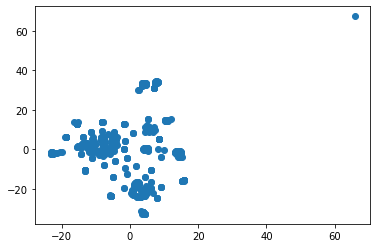

In [25]:
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()

Looks like we have at least 2 but possibly 4 clusters along with outlier using the t-SNE reduction

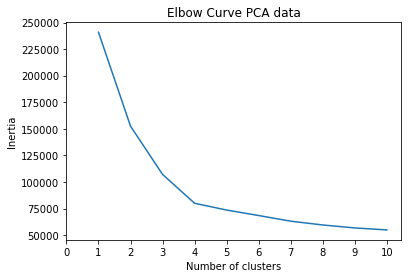

In [26]:
from sklearn.cluster import KMeans
#Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve PCA data')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

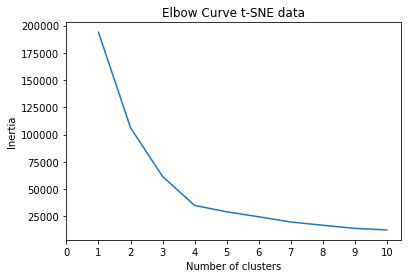

In [27]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)
    
elbow_data_tsne = {"k": k, "inertia": inertia}
df_elbow_tsne = pd.DataFrame(elbow_data_tsne)

plt.plot(df_elbow_tsne['k'], df_elbow_tsne['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve t-SNE data')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [28]:
df_elbow_tsne

,k,inertia
0,1,193861.703125
1,2,106257.546875
2,3,61522.722656
3,4,34930.859375
4,5,29118.818359
5,6,24517.972656
6,7,19752.583984
7,8,16759.871094
8,9,13900.576172
9,10,12472.914062


In [29]:
#Predicting clusters with k=4

#Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)
model.fit(tsne_features)

predictions = model.predict(tsne_features)

print(tsne_features)

[[  2.3370388 -16.509146 ]
 [  4.256732  -23.430119 ]
 [  3.1872015 -31.172997 ]
 ...
 [-22.714502   -2.1987202]
 [-15.577416   13.012149 ]
 [  5.362085   10.263799 ]]


In [32]:
#Create df using tnse_features and append class column containing generated labels
tsne_df = pd.DataFrame(tsne_features, columns = ['F1', 'F2'])
tsne_df['class'] = model.labels_
tsne_df

,F1,F2,class
0,2.337039,-16.509146,1
1,4.256732,-23.430119,1
2,3.187201,-31.172997,1
3,4.635318,33.229172,2
4,-18.735622,6.302910,3
...,...,...,...
527,2.688528,30.296535,2
528,0.953220,-22.453728,1
529,-22.714502,-2.198720,3
530,-15.577416,13.012149,3


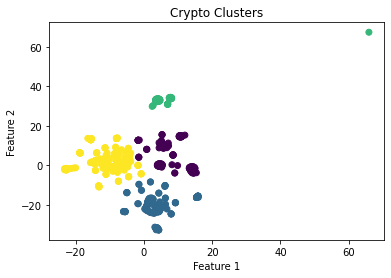

In [33]:
#Plot tsne_df using class column as label coloring
plt.scatter(x=tsne_df['F1'], y=tsne_df['F2'], c=tsne_df['class'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Crypto Clusters')

plt.show()

From the t-SNE clustering data, it does look like Crypto curriencies can be clustered reliably into 4 distinct clusters, and the fourth cluster contains outliers